<a href="https://colab.research.google.com/github/Aikha-Zaki/stroke-prediction/blob/main/Stroke_Phyton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import copy

In [ ]:
#read dataste
dataset=pd.read_csv("/content/full_data.csv")

In [ ]:
#duplicate
df=copy.copy(dataset)
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
#data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
# convert hypertension, heart_disease, and stroke to categoriacal data
# df['Marks'] = df['Marks'].astype(str)
# df = df.astype({"Age": 'str', "Accuracy": 'str'}) 
# df.dtypes
# type(df)
toConvert = ['hypertension','heart_disease','stroke']
df[toConvert] = df[toConvert].astype(str)
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

Visualization with SweetVis

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 28.4 MB/s 


                                             |          | [  0%]   00:00 -> (? left)

Report Full_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



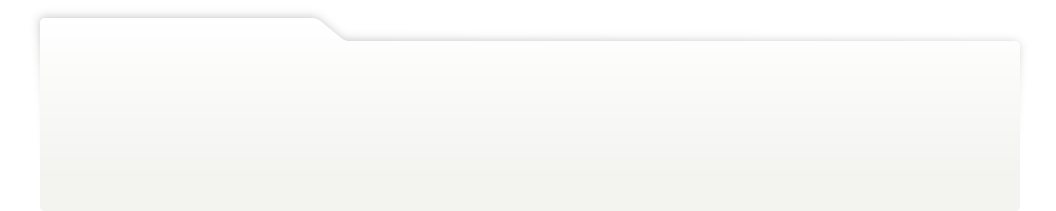
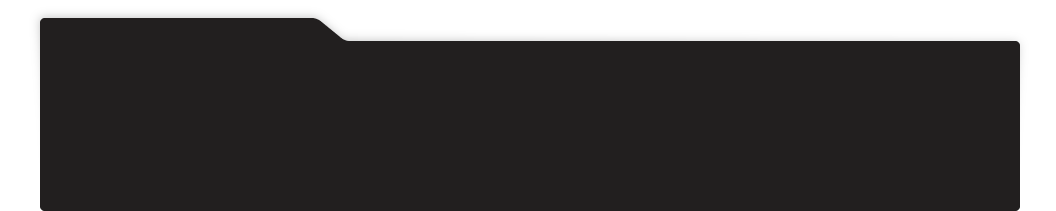
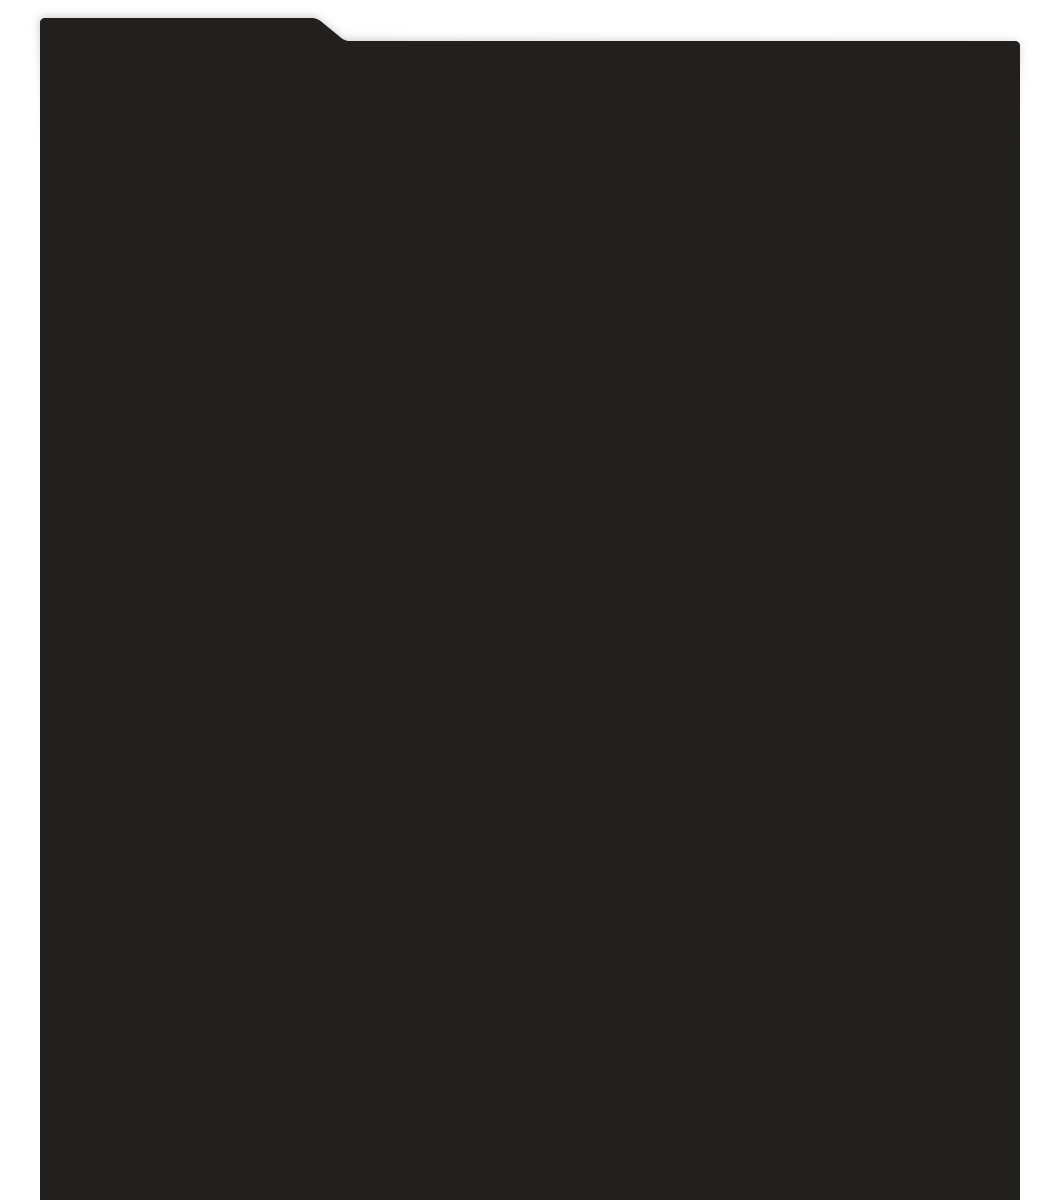
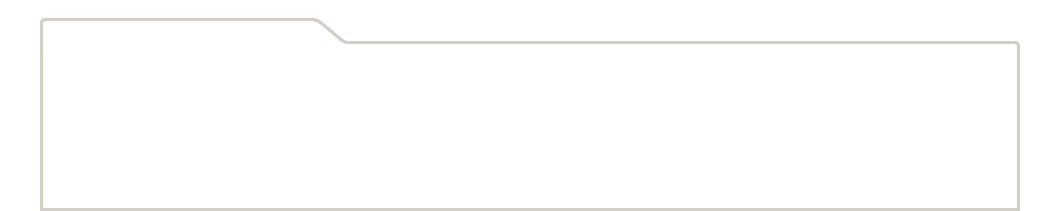
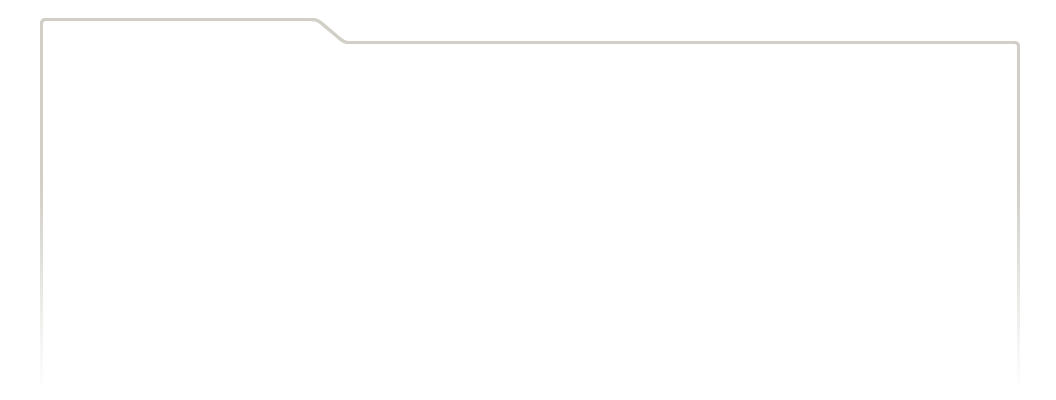
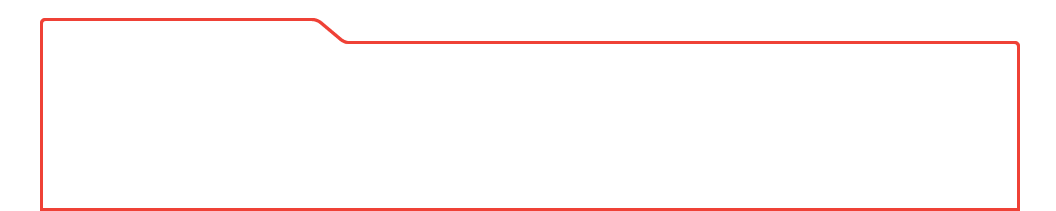
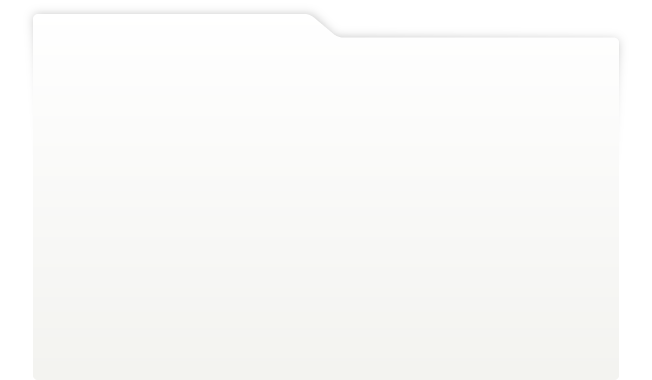
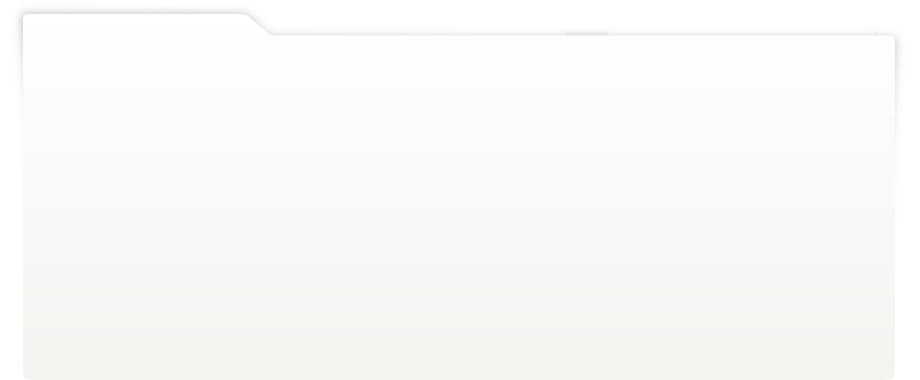
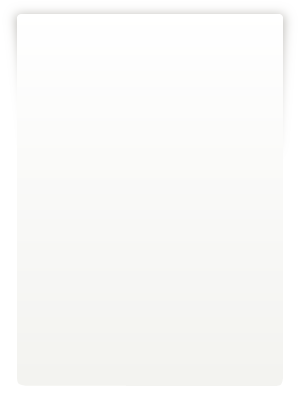
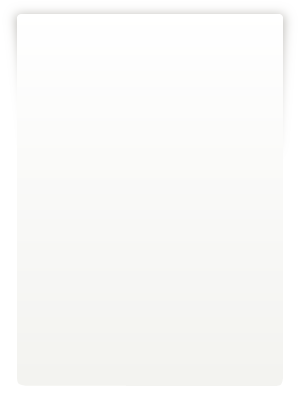
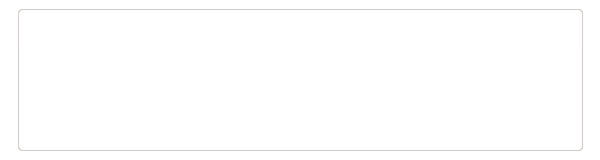
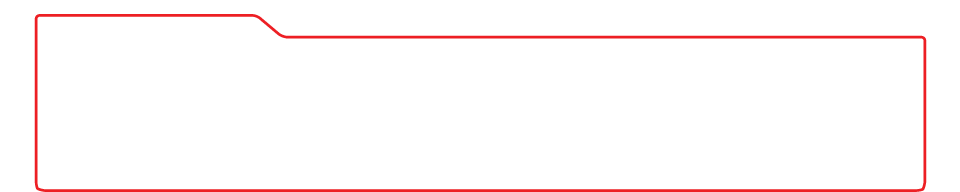
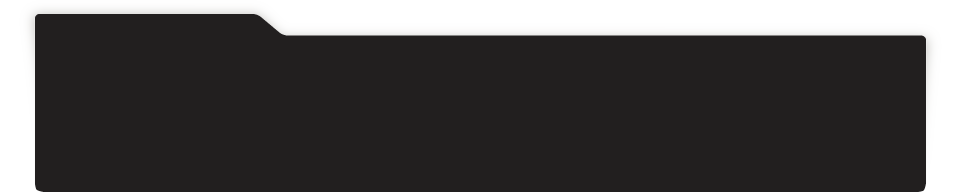
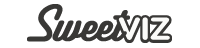
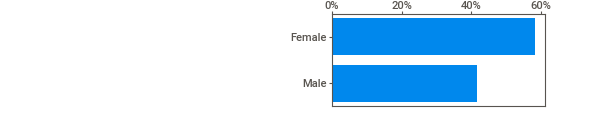
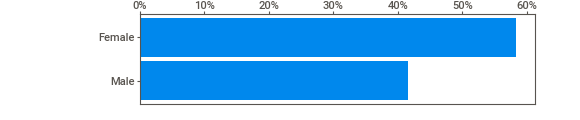
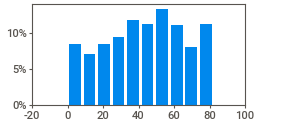
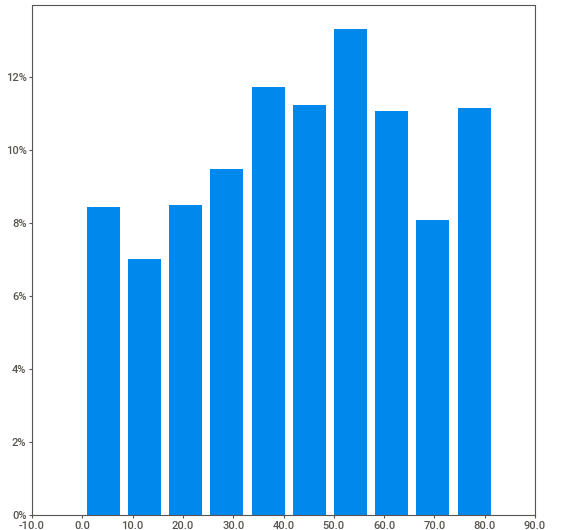
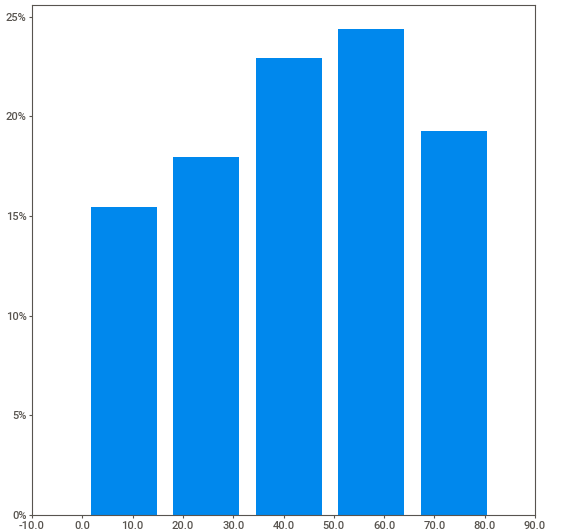
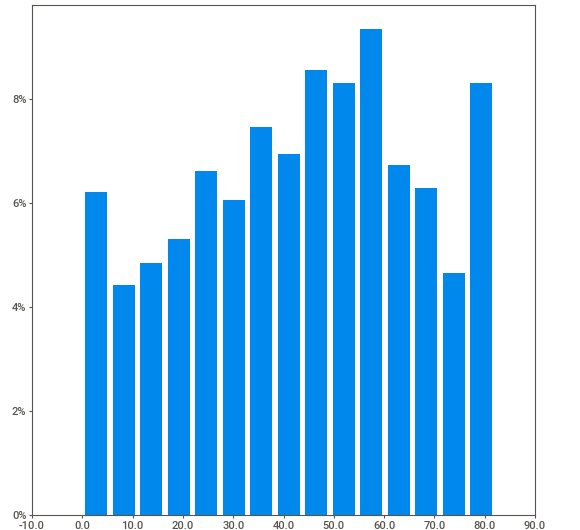
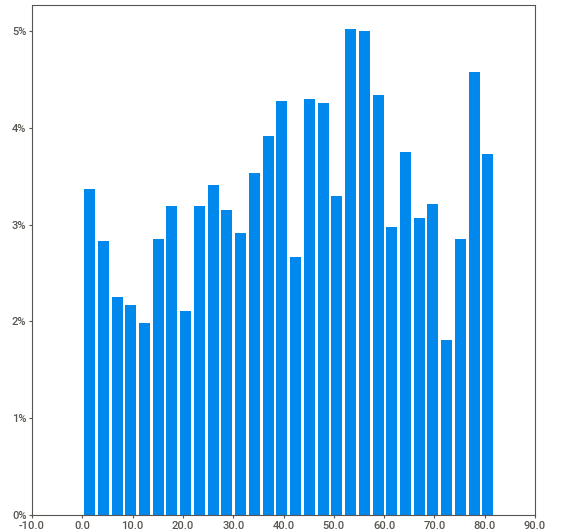
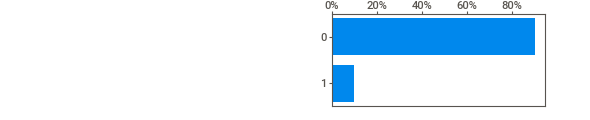
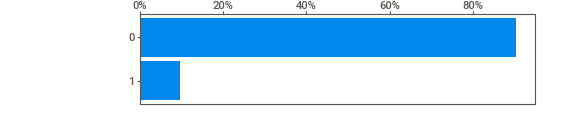
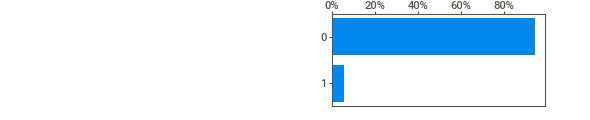
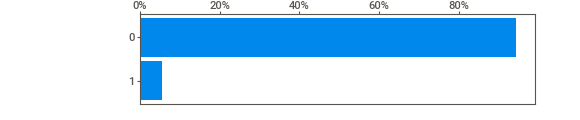
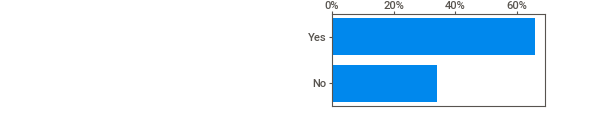
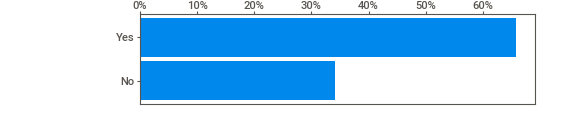
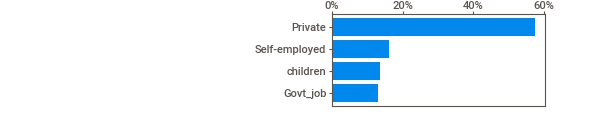
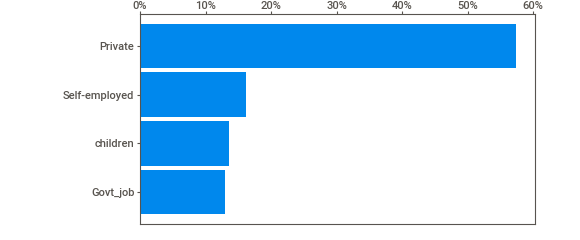
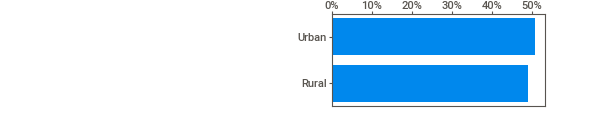
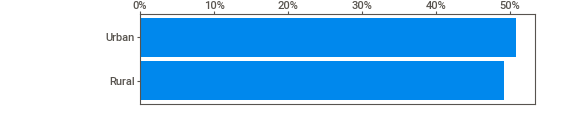
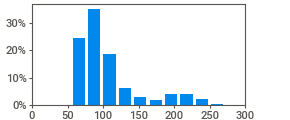
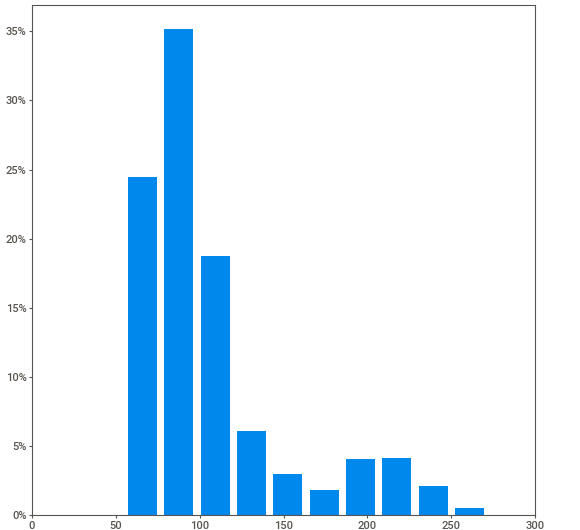
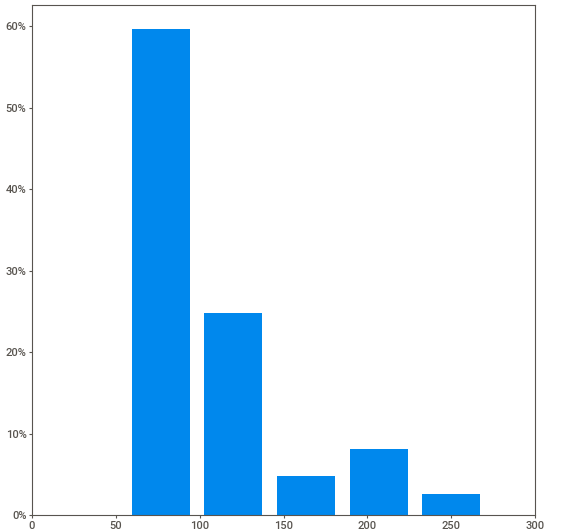
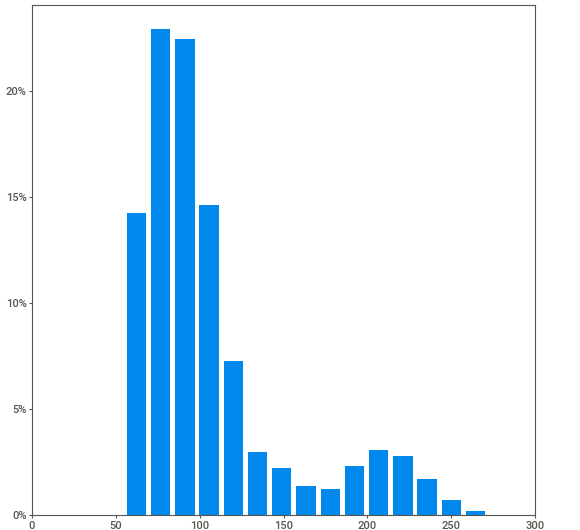
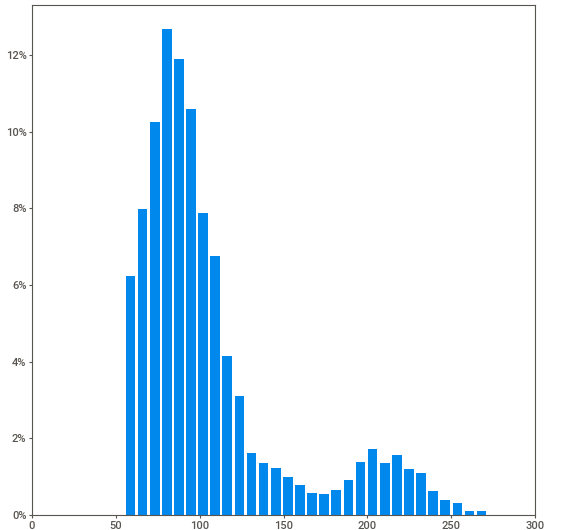
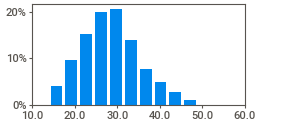
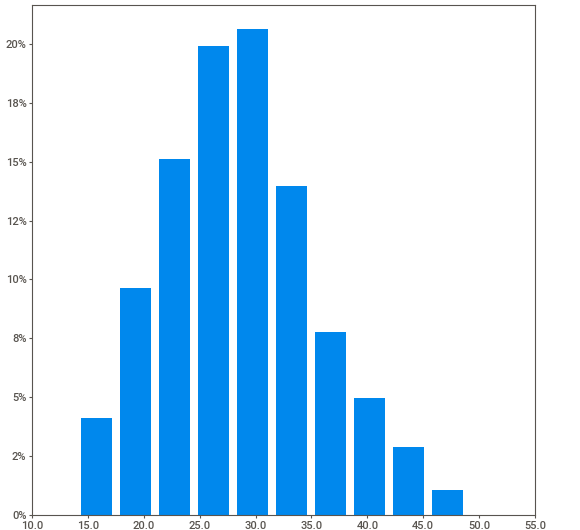
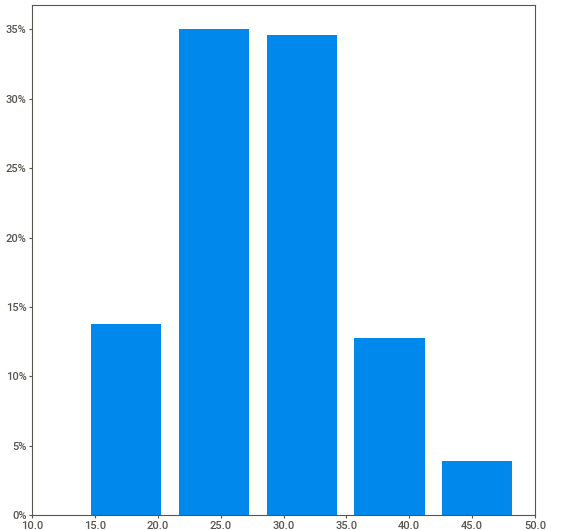
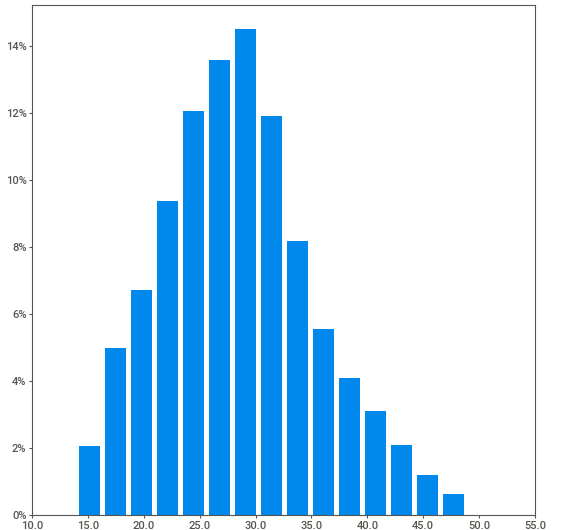
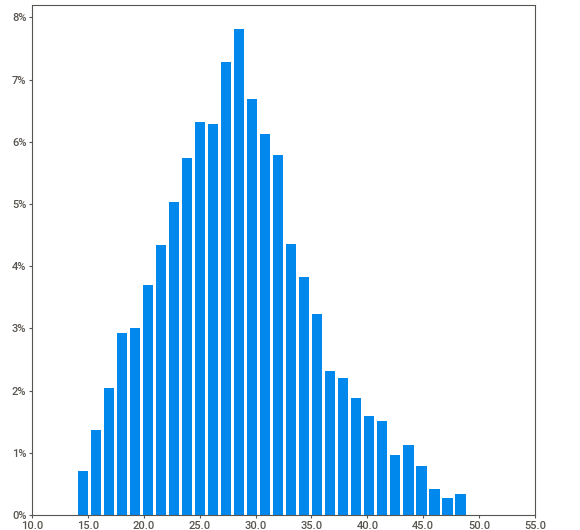
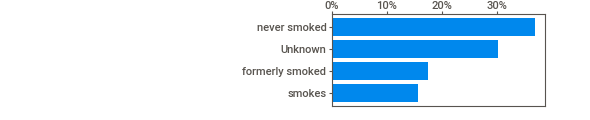
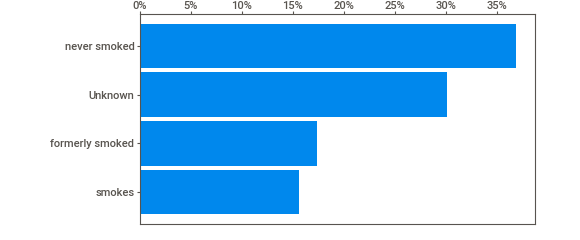
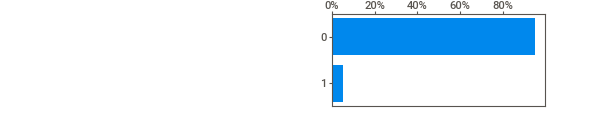
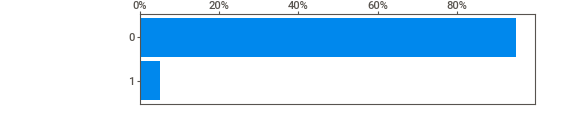
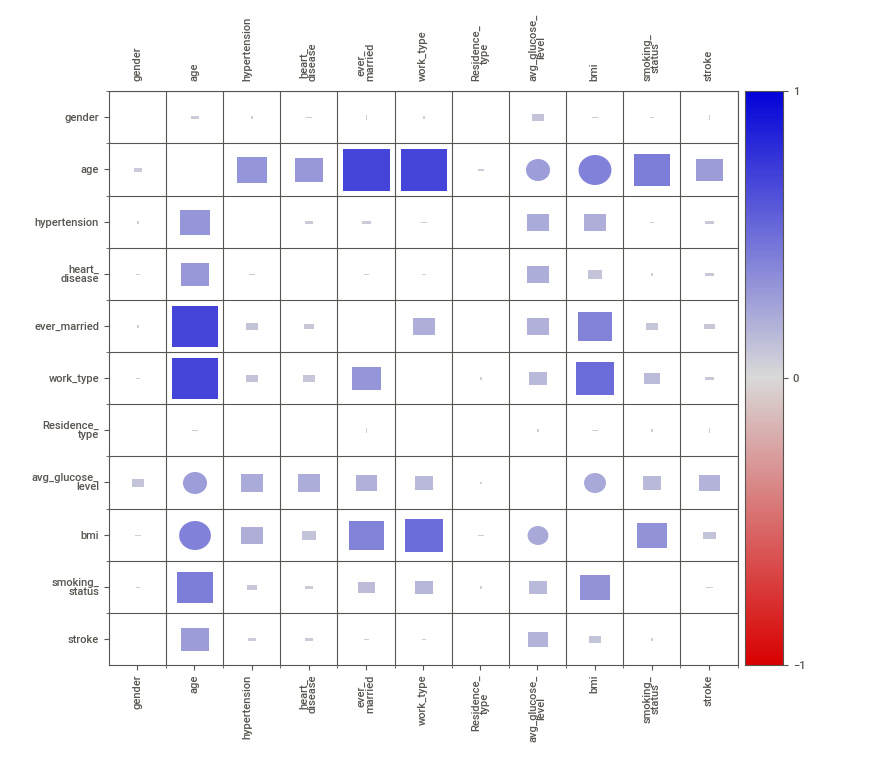
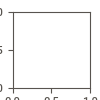

In [ ]:
#import library

import sweetviz as viz
import seaborn as sns 
import matplotlib.pyplot as plt

# analyze the dataset
full_report = viz.analyze(df)

# display the report
full_report.show_html('Full_report.html')
full_report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


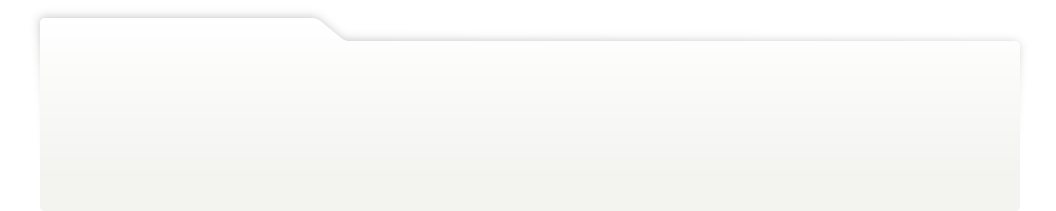
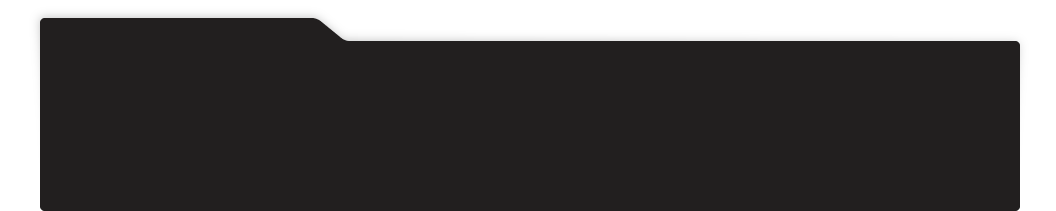
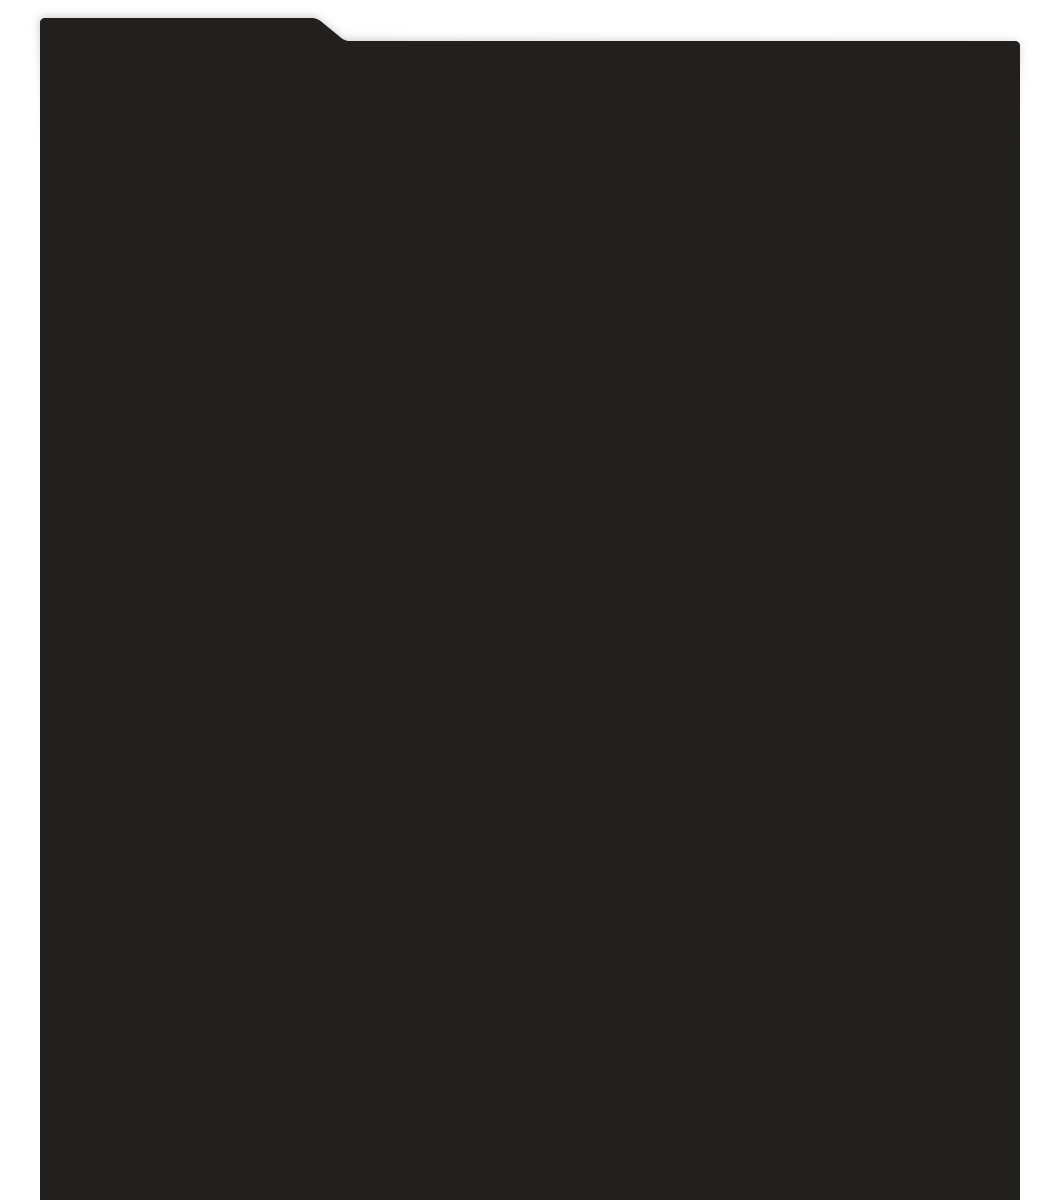
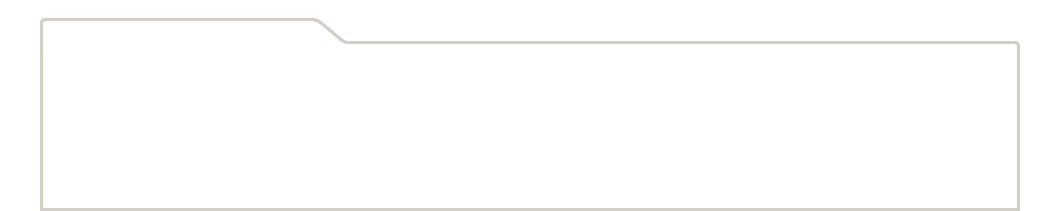
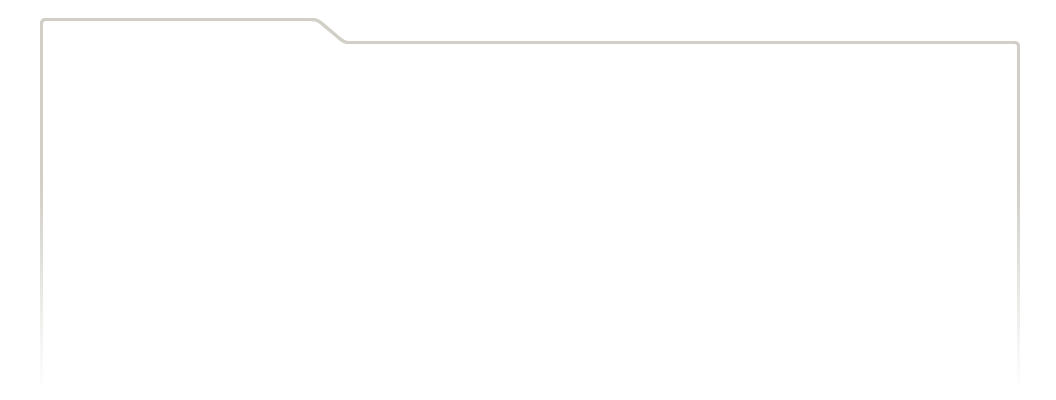
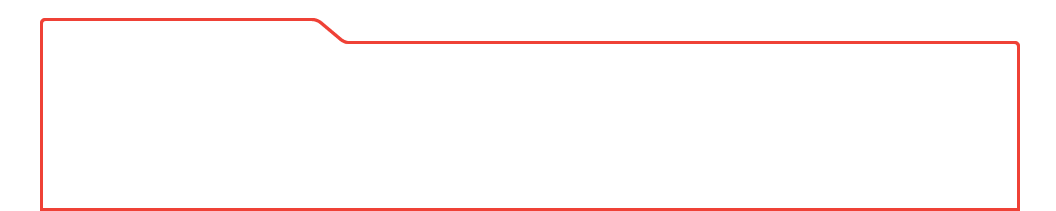
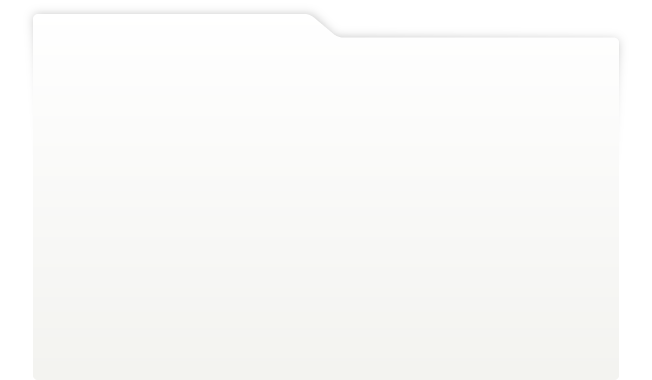
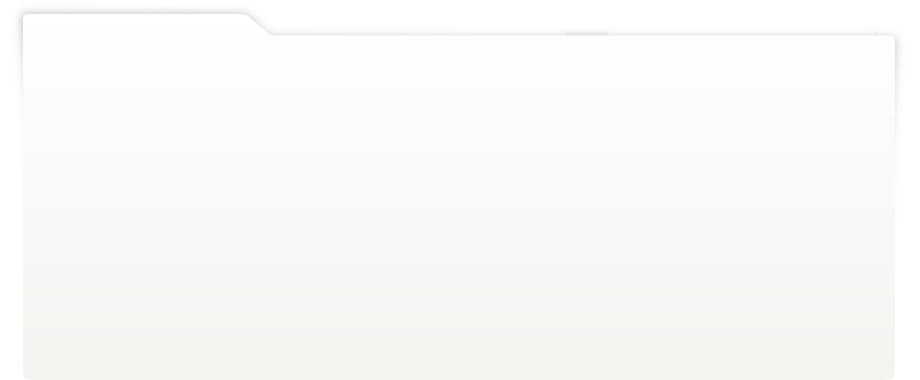
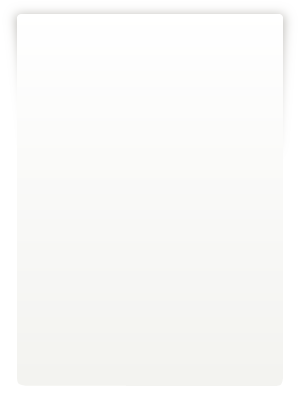
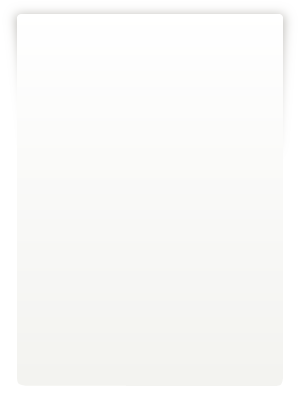
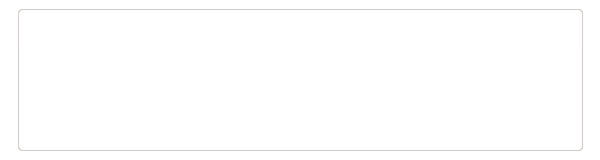
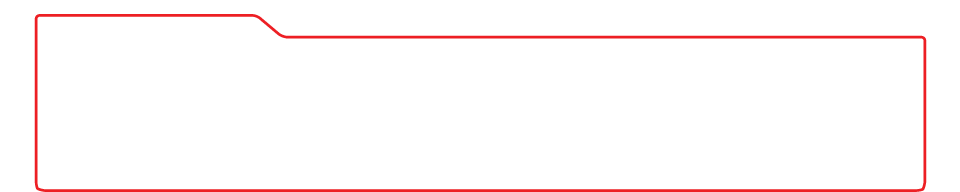
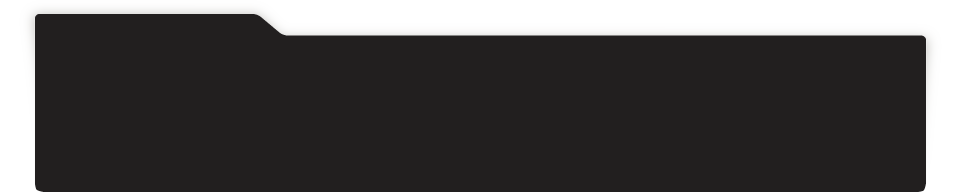
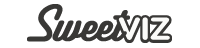
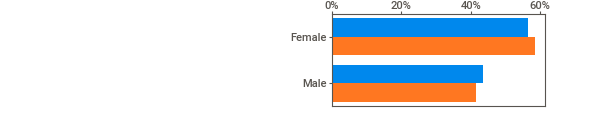
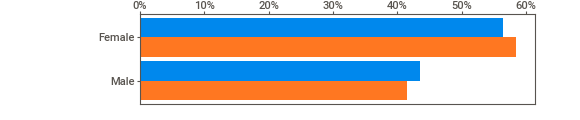
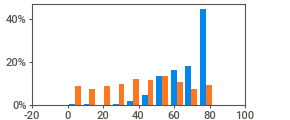
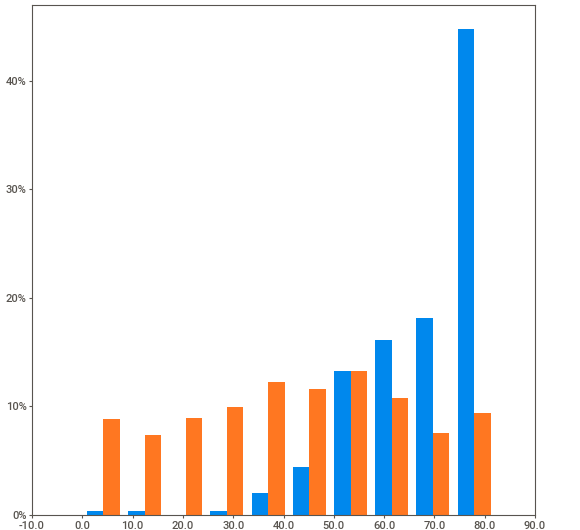
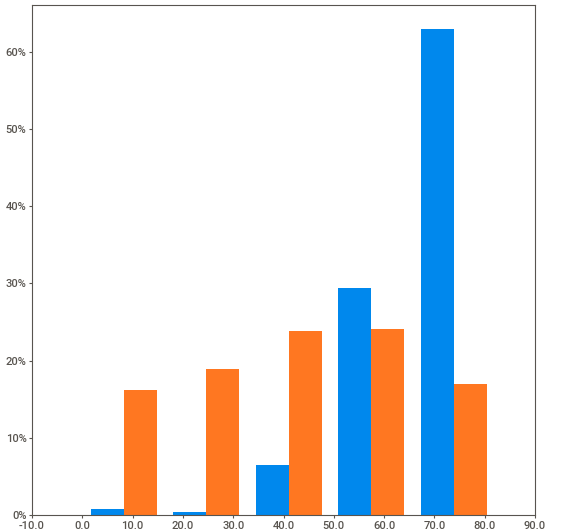
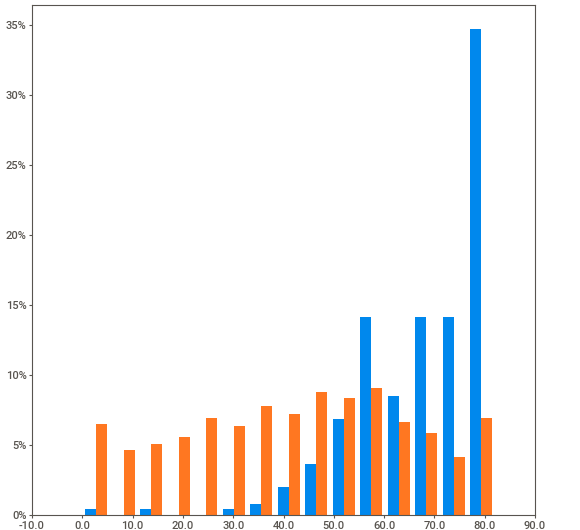
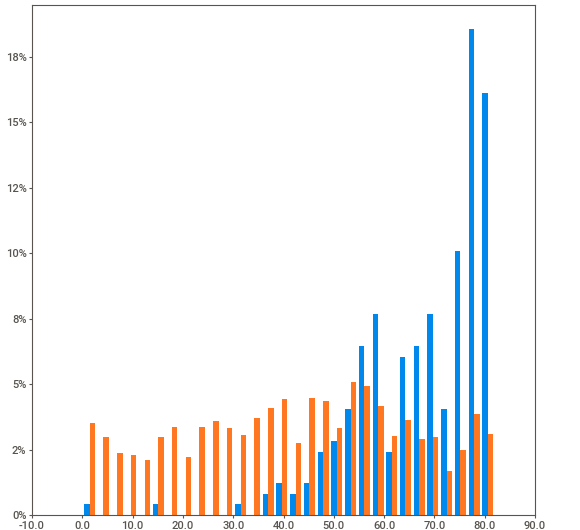
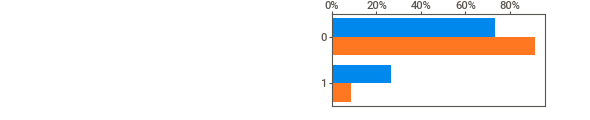
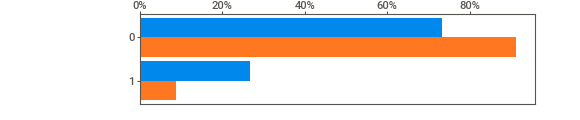
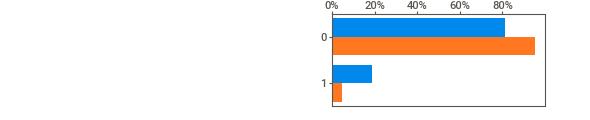
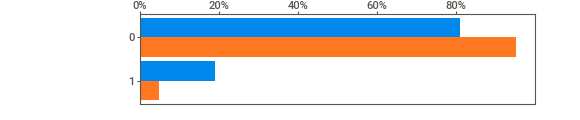
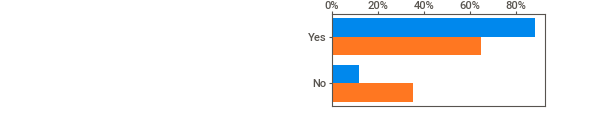
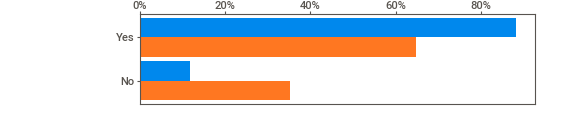
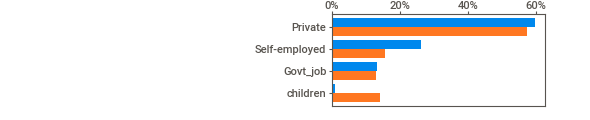
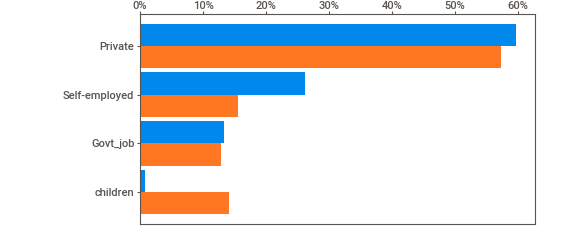
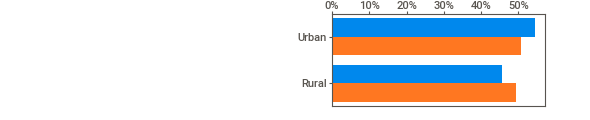
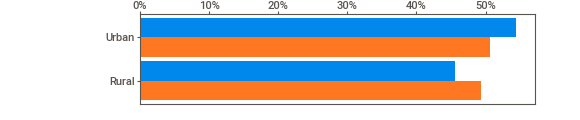
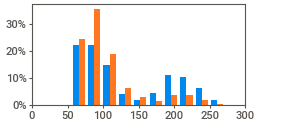
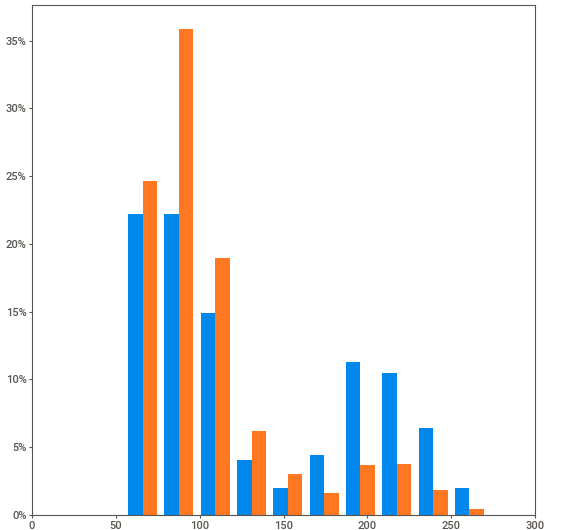
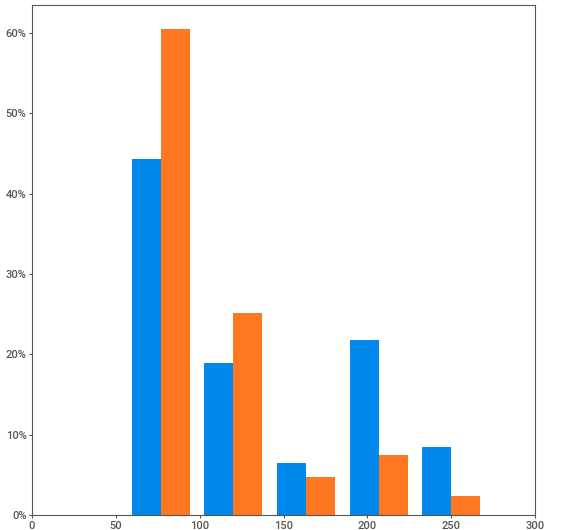
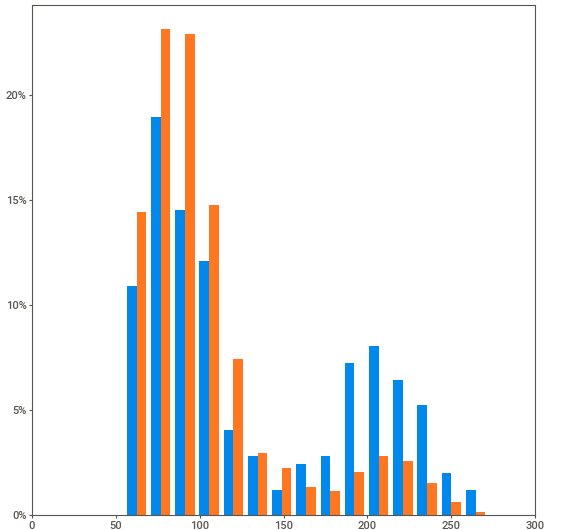
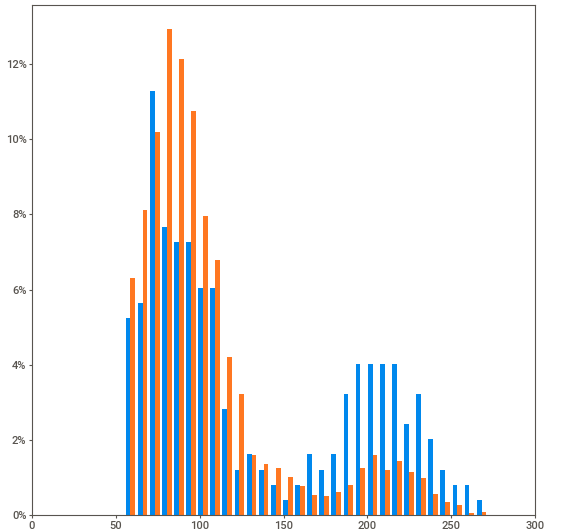
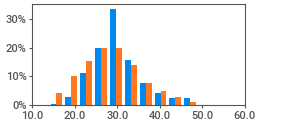
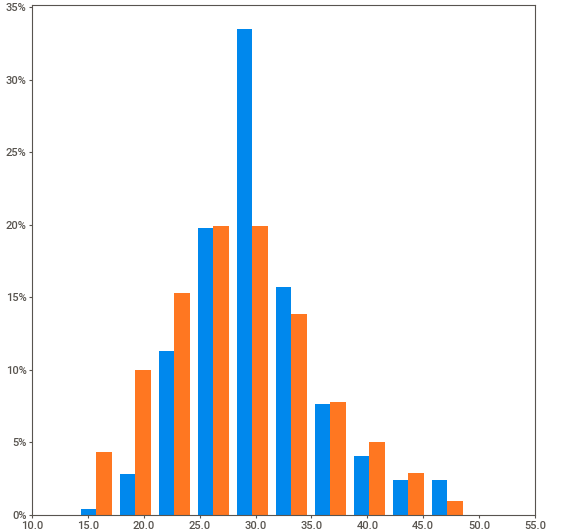
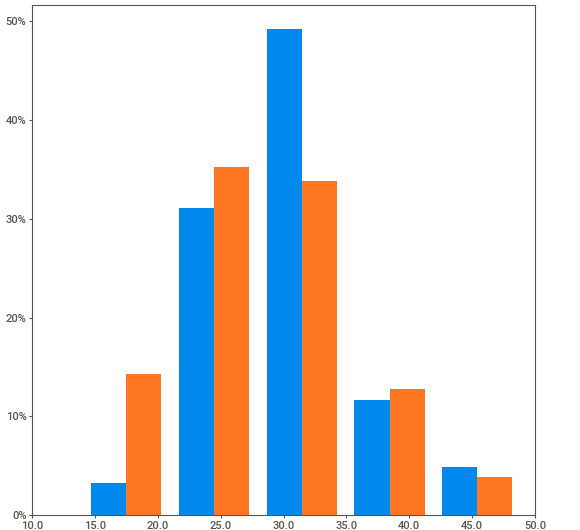
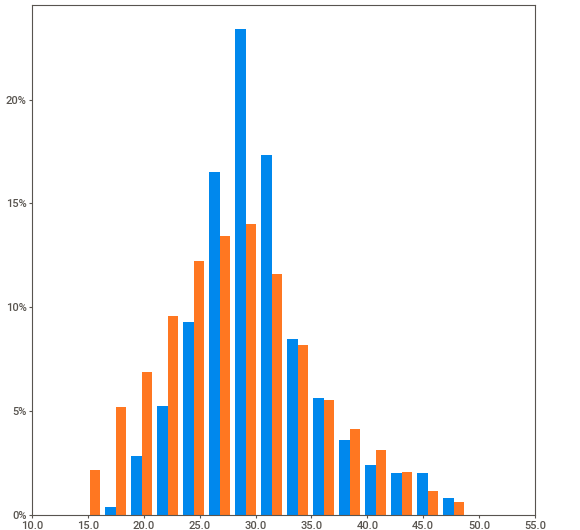
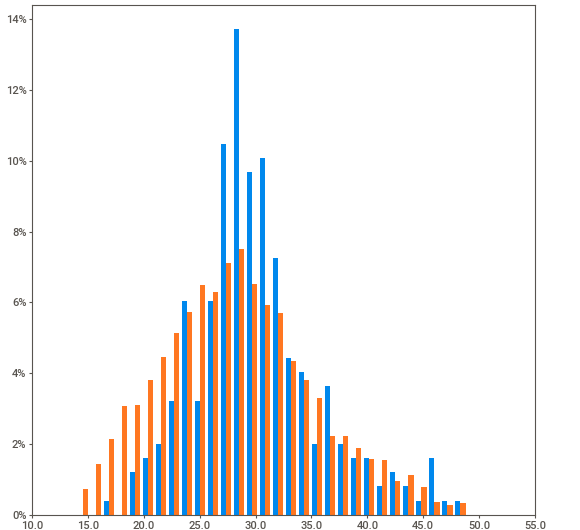
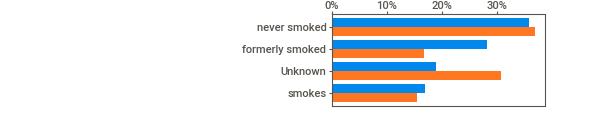
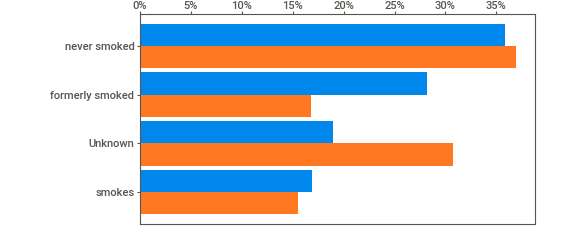
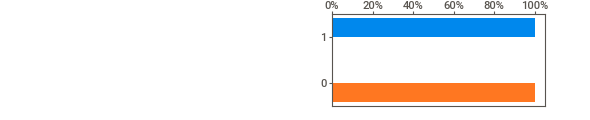
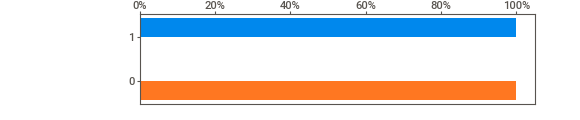
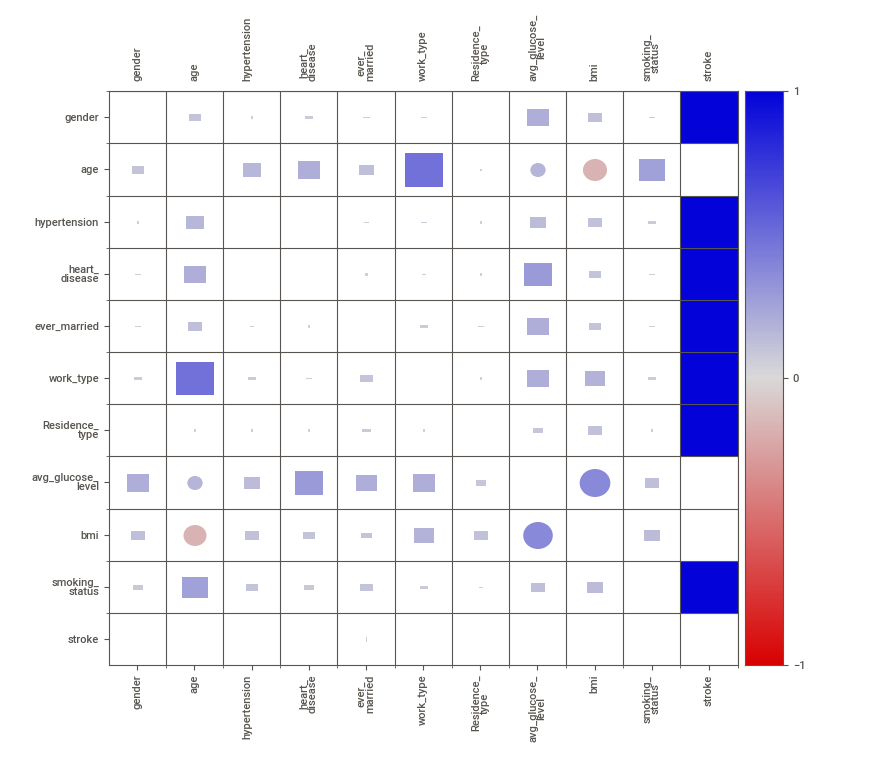
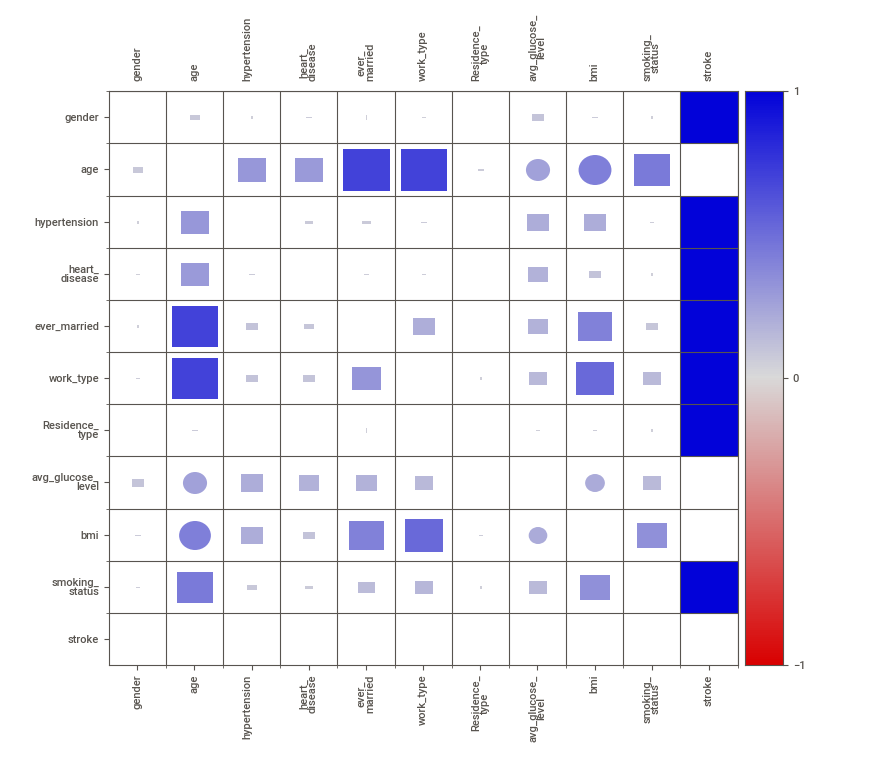

In [ ]:
# Compare stroke and without stroke
# a = df [df['stroke'] == '1']
# b = df [df['stroke'] == '0']
compare_report = viz.compare([df[df['stroke']=='1'],'With Stroke'],[df[df['stroke'] == '0'],'Without Stroke']) 
compare_report.show_notebook() 

Machine Learning

In [ ]:
# ML model
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Splitter
from sklearn.model_selection import train_test_split

# Reporting
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# plotting
import matplotlib.pyplot as plt

Split data to training and test dataframe

In [ ]:
# Split data to training and test dataframe
X = df.drop('stroke', axis=1)  
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Visualize training-testing dataset

                                             |          | [  0%]   00:00 -> (? left)


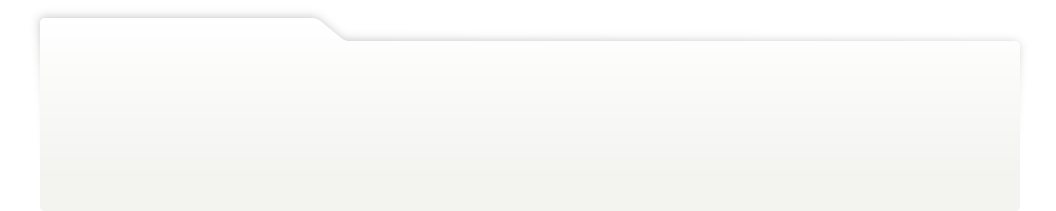
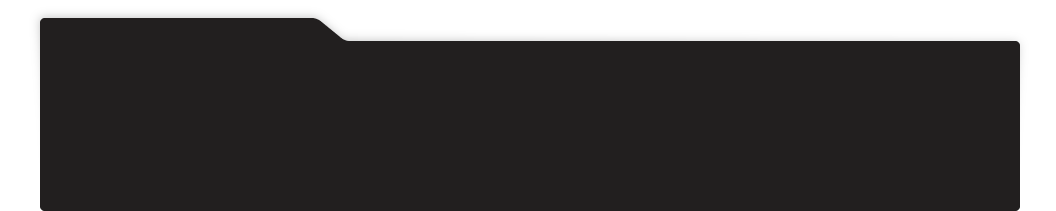
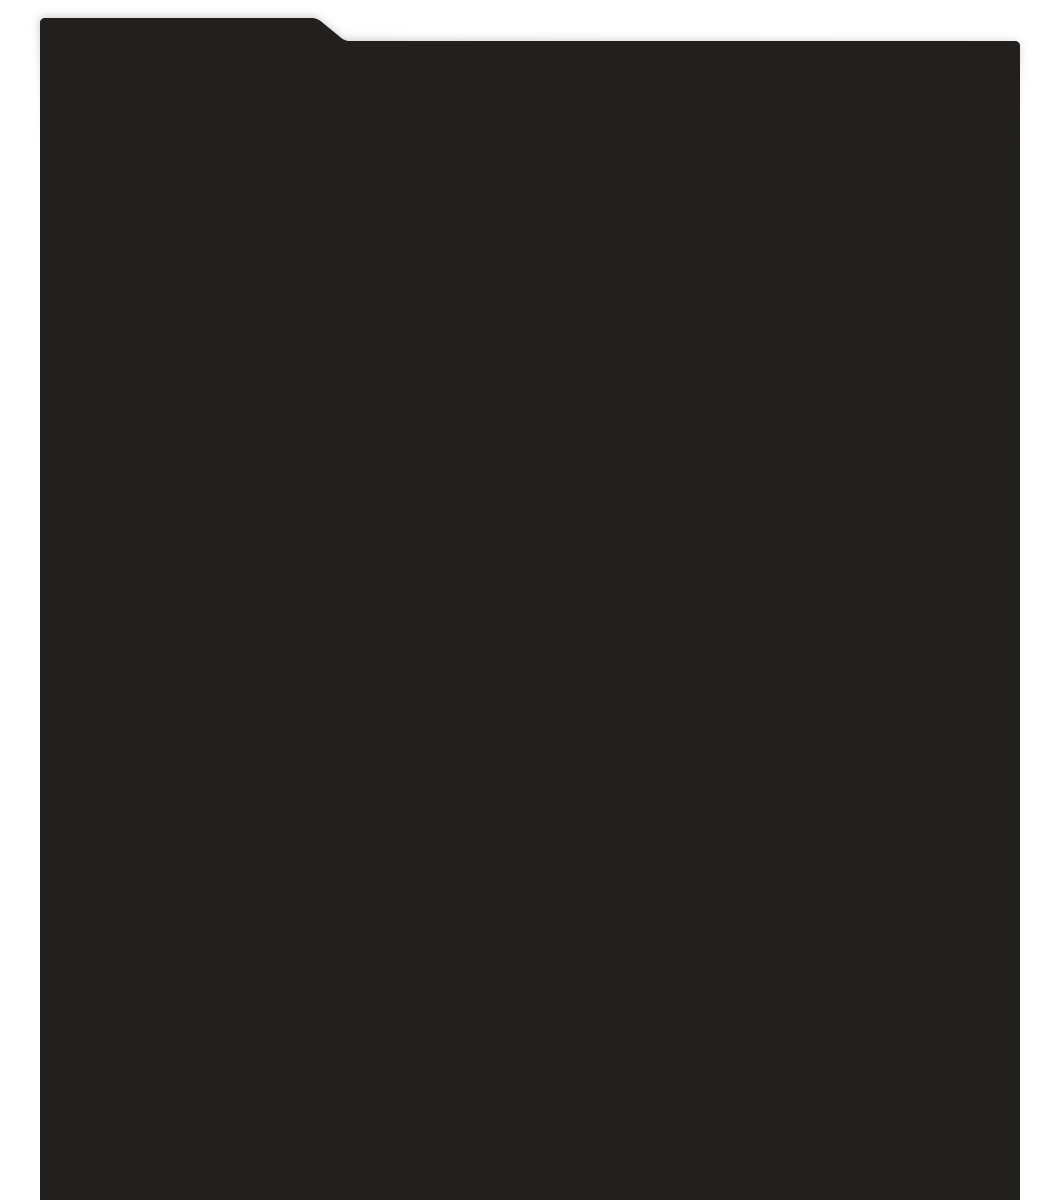
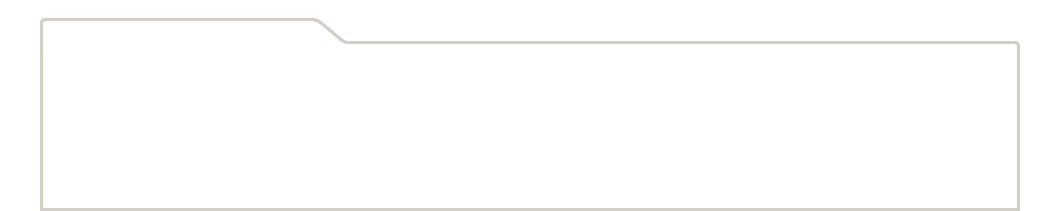
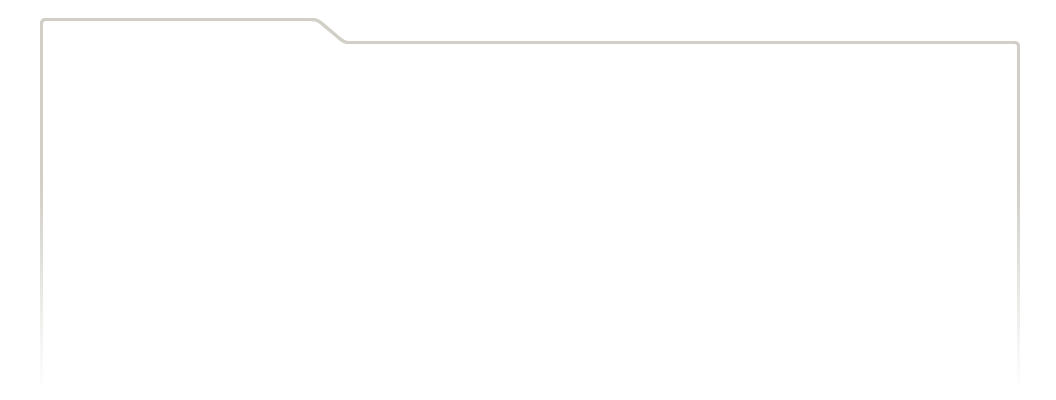
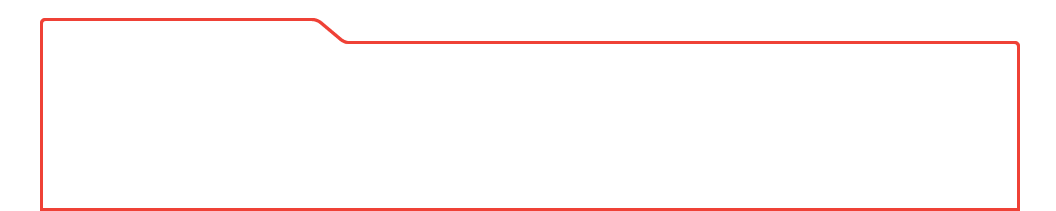
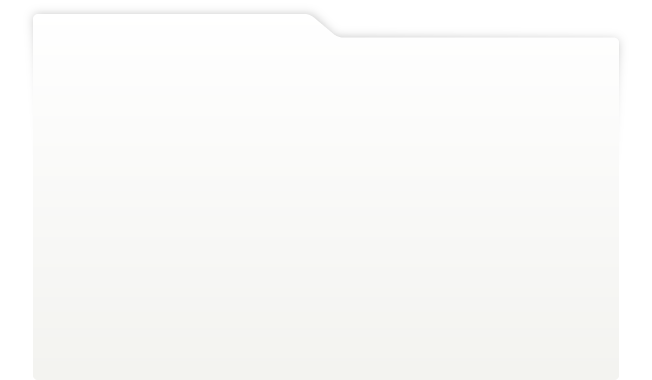
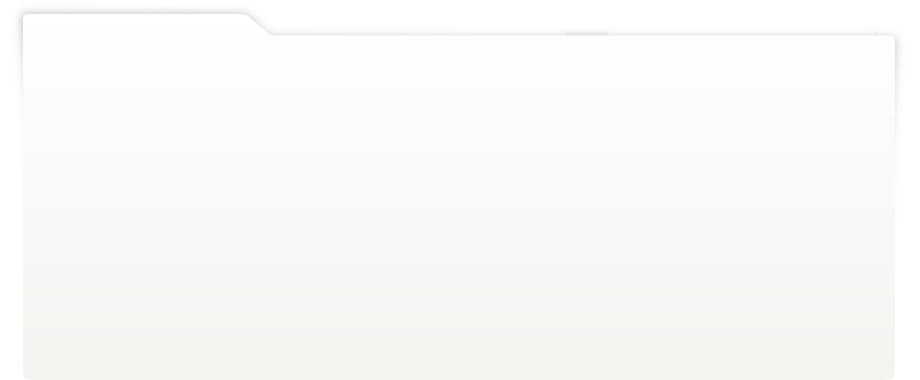
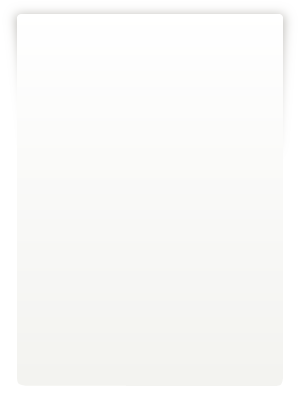
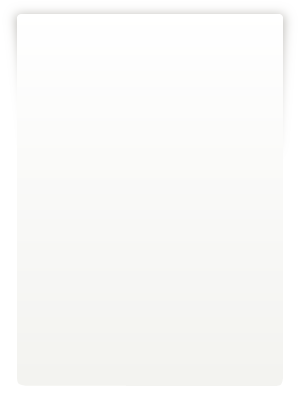
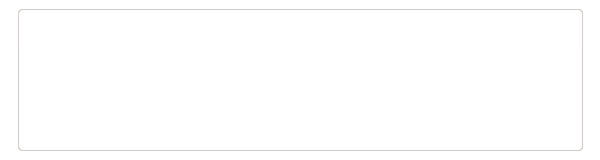
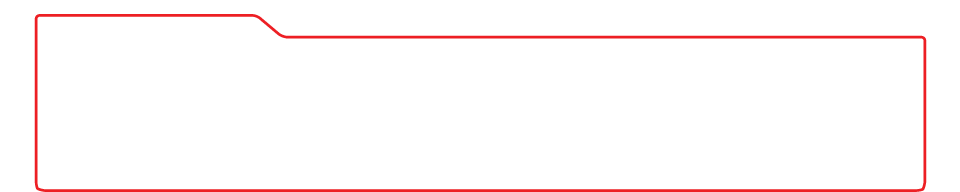
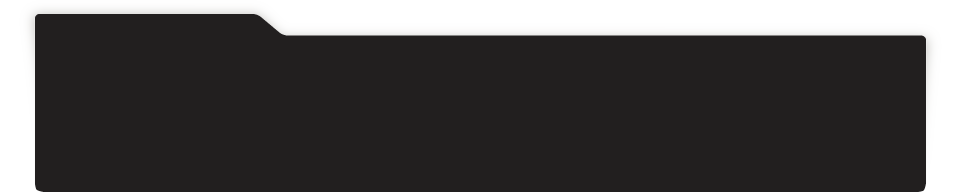
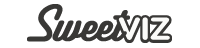
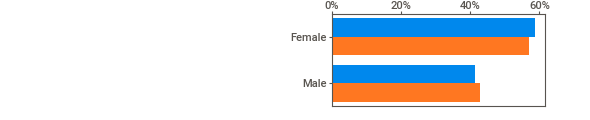
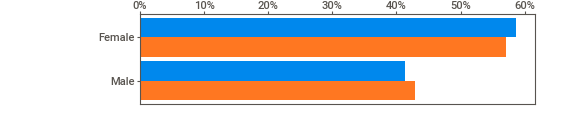
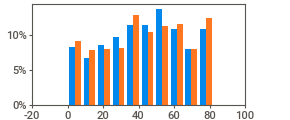
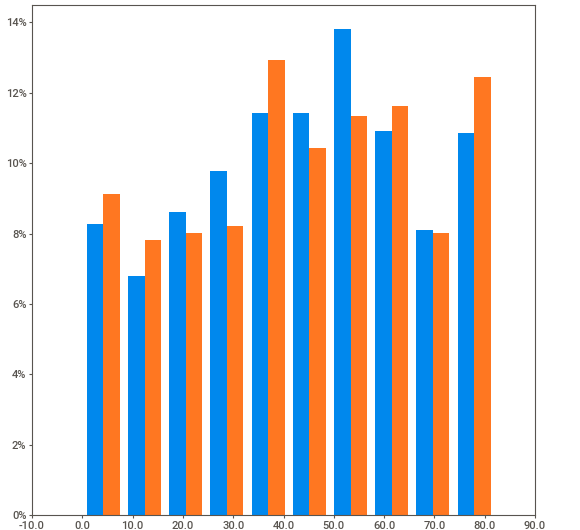
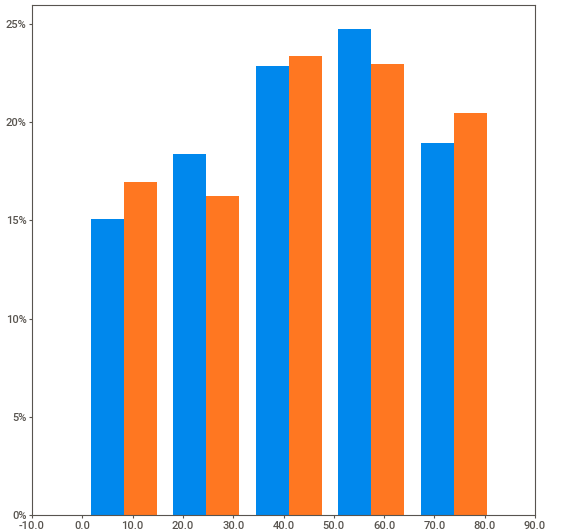
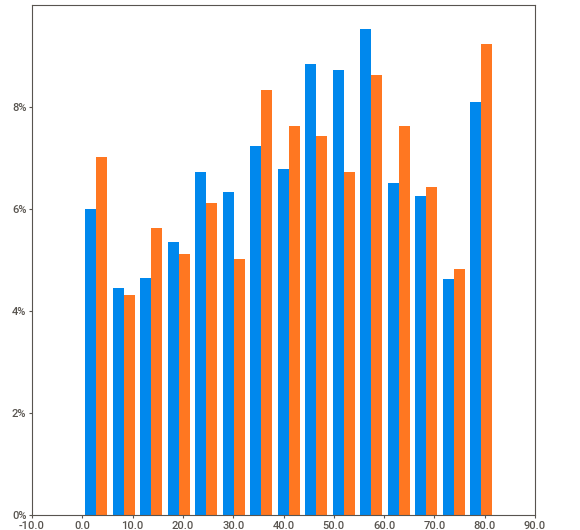
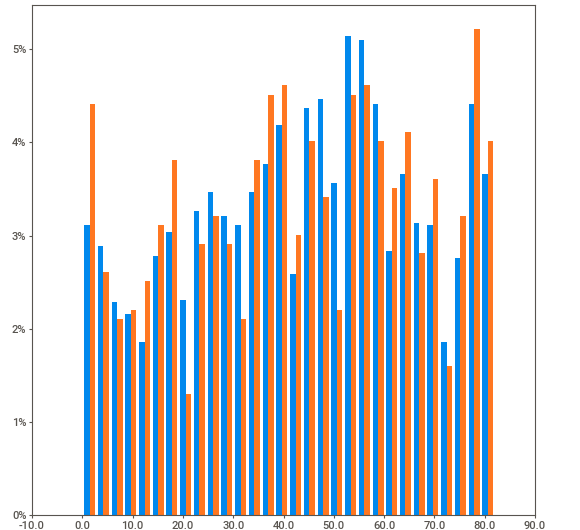
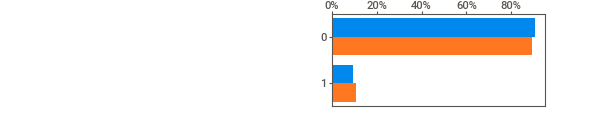
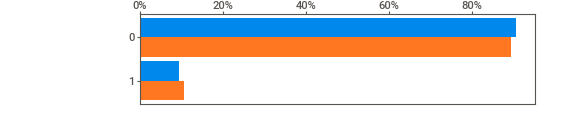
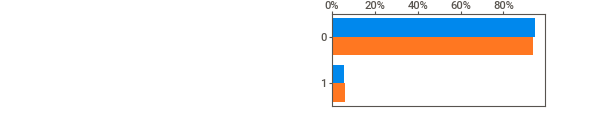
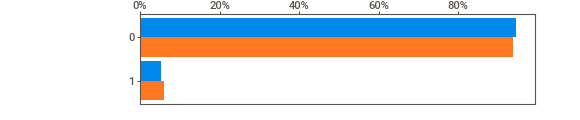
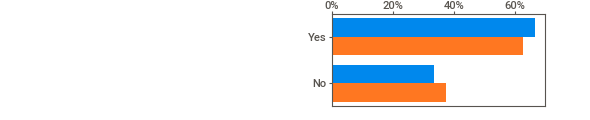
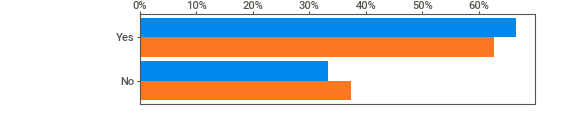
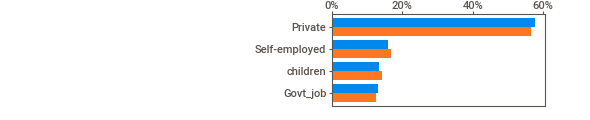
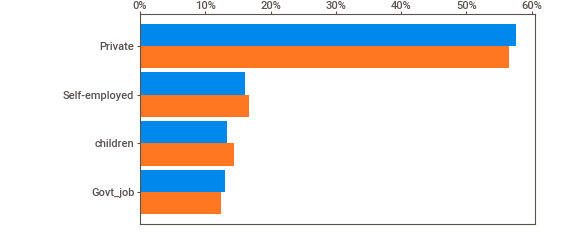
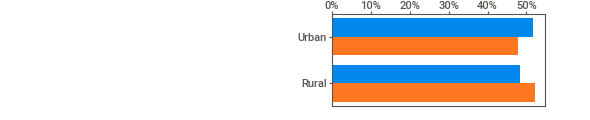
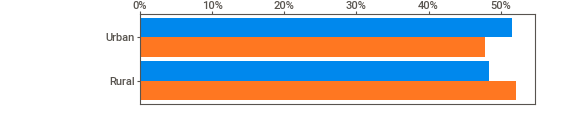
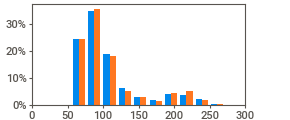
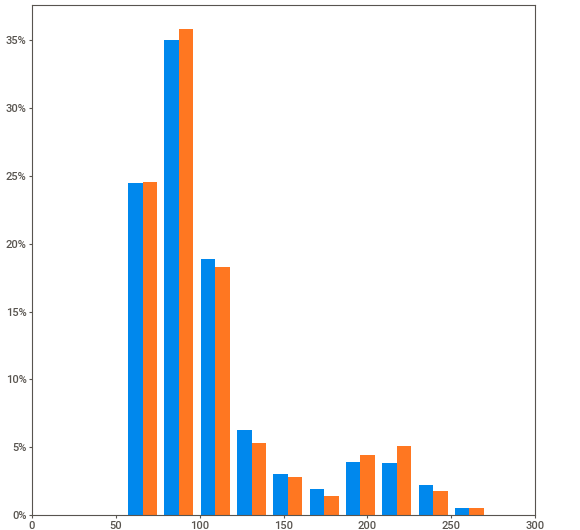
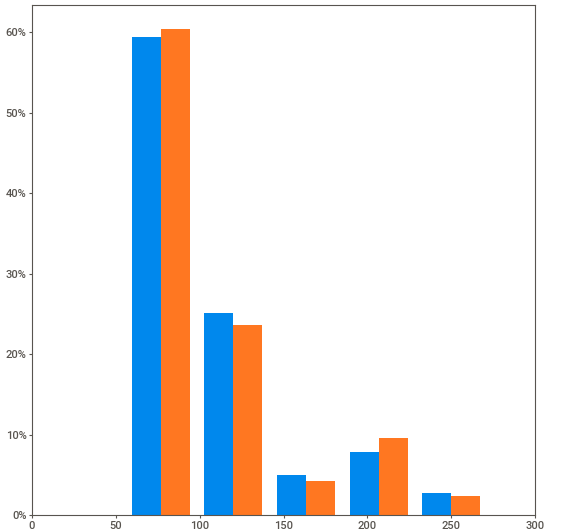
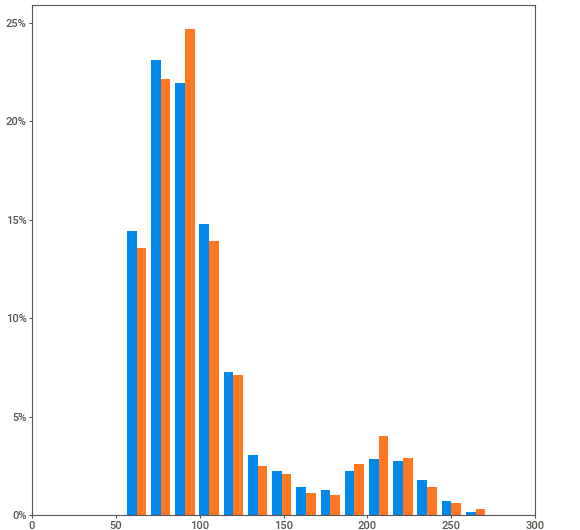
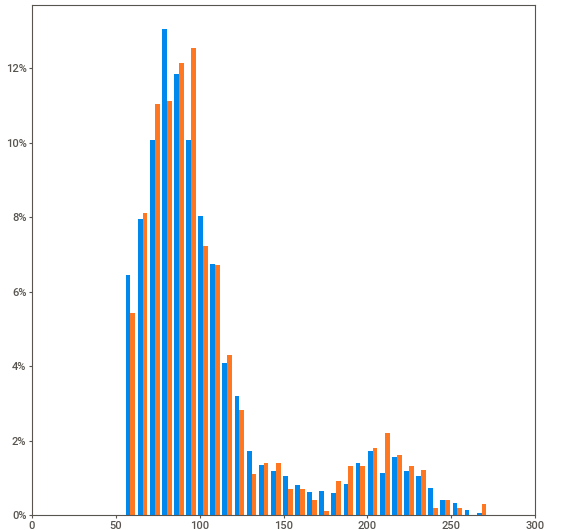
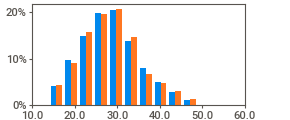
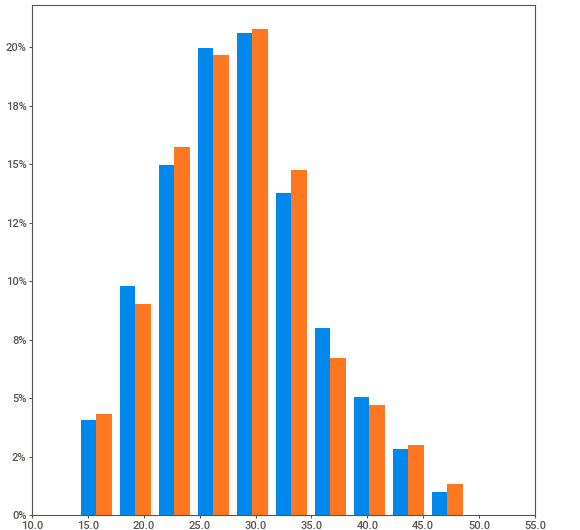
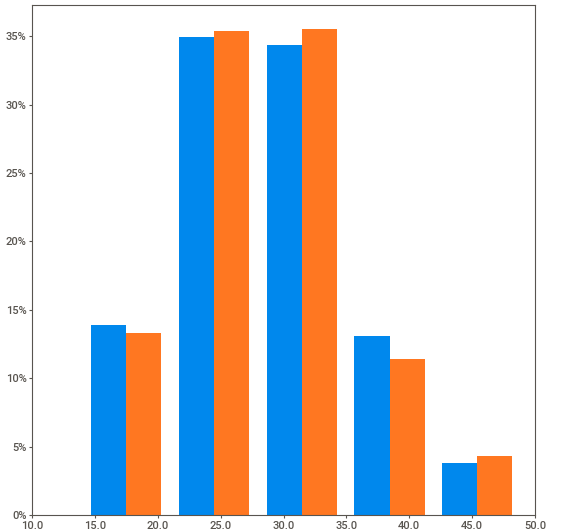
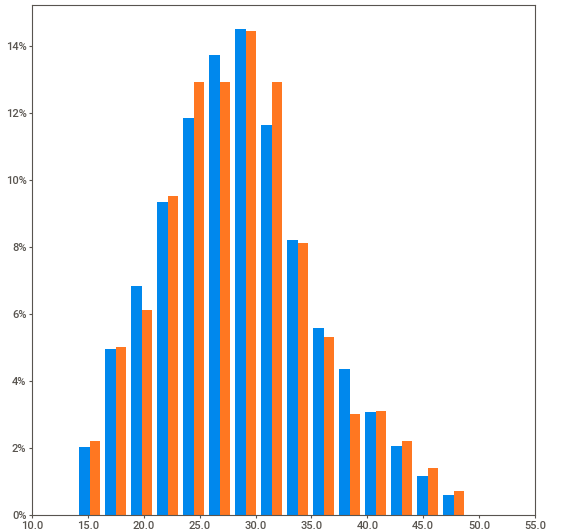
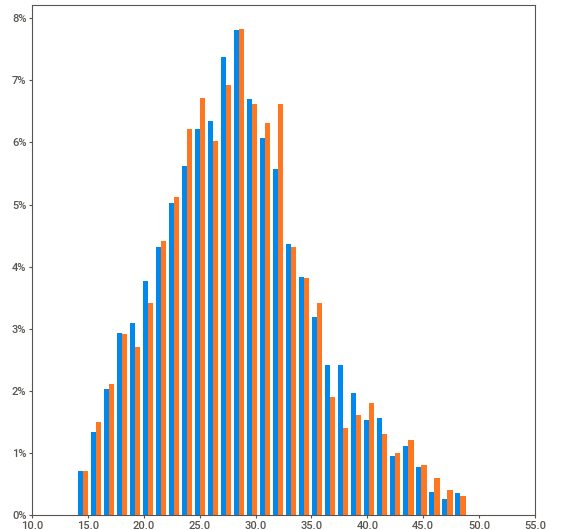
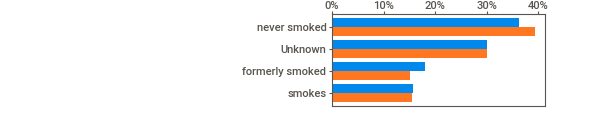
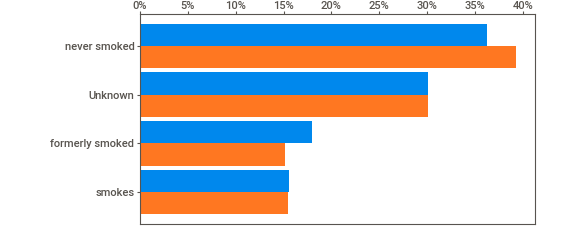
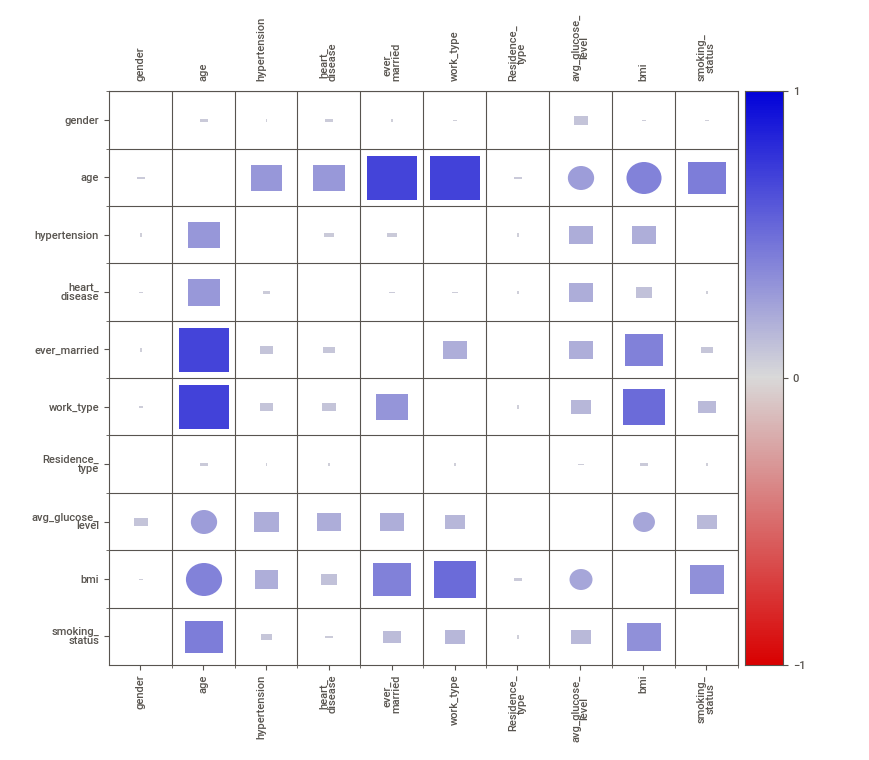
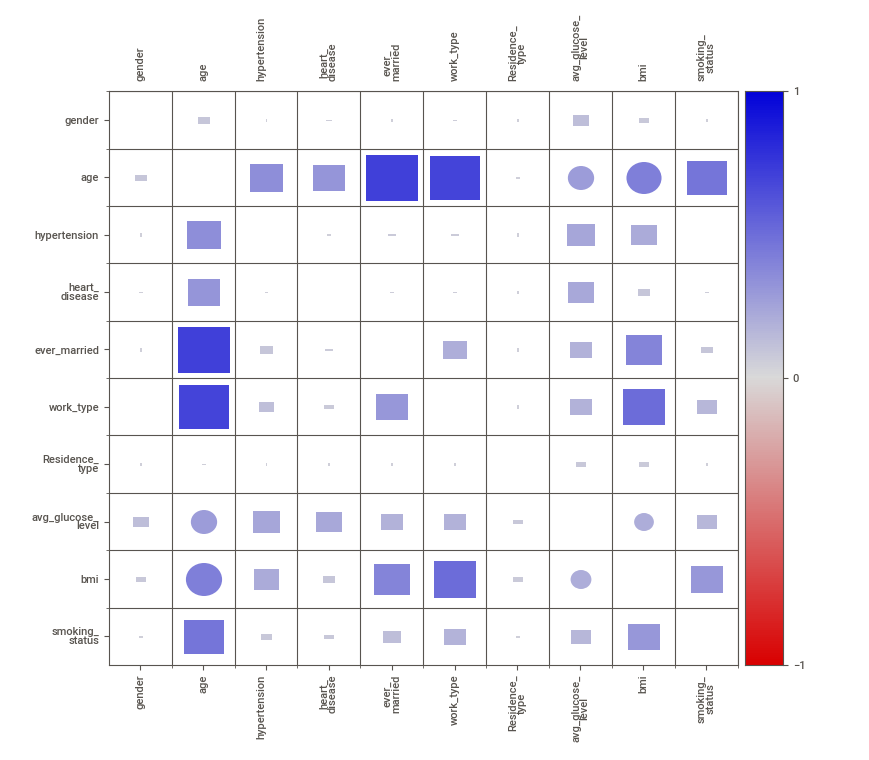

In [ ]:
# display training and testing dataset
compare_dataset_report = viz.compare([X_train, 'Train'], [X_test, 'Test'])
compare_dataset_report.show_notebook() 

In [ ]:
X_train.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

Encode categorical data


In [ ]:
# Encode categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['hypertension'] = le.fit_transform(df['hypertension'])
df['heart_disease'] = le.fit_transform(df['heart_disease'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
# df['stroke'] = le.fit_transform(df['stroke'])
print(df.dtypes)

# Split data to training and test dataframe - after encoded
X = df.drop('stroke', axis=1)  
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                object
dtype: object


Gaussian Naives Bayes

Gaussian Naives Bayes
Training Score: 0.86
Testing Score: 0.847
Accuracy Score: 0.847

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.92       955
           1       0.13      0.45      0.20        42

    accuracy                           0.85       997
   macro avg       0.55      0.66      0.56       997
weighted avg       0.94      0.85      0.88       997

Confusion matrix:
[[825 130]
 [ 23  19]]

Plot Confusion matrix:


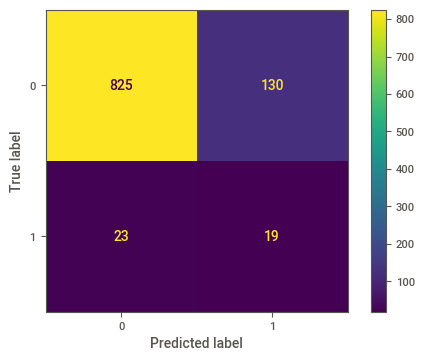

In [ ]:
# Gaussian Naives Bayes
model_gaussian = GaussianNB()                      
model_gaussian.fit(X_train, y_train)                  
y_gaussian = model_gaussian.predict(X_test)

#Score 
train_score = model_gaussian.score(X_train, y_train)
test_score = model_gaussian.score(X_test, y_test)

print("=====================")
print("Gaussian Naives Bayes")
print("=====================")

# Evaluation
print(f'Training Score: {train_score.round(3)}')
print(f'Testing Score: {test_score.round(3)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_gaussian).round(3)}')
# print("Gaussian model test accuracy: {}\n".format(accuracy_score(y_test, y_gaussian)))

print("\nClassification Report:\n{}".format(classification_report(y_test, y_gaussian))) 

confusion_matrix = metrics.confusion_matrix(y_test, y_gaussian)
print("Confusion matrix:\n{}\n".format(confusion_matrix))

print("Plot Confusion matrix:")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=np.unique(y))
cm_display.plot()
plt.show()

KNN

KNN model test accuracy: 0.9468405215646941

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       955
           1       0.08      0.02      0.04        42

    accuracy                           0.95       997
   macro avg       0.52      0.51      0.50       997
weighted avg       0.92      0.95      0.93       997

Confusion matrix:
[[943  12]
 [ 41   1]]

Plot Confusion matrix:


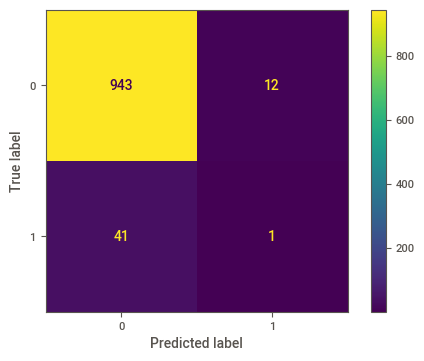

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

y_knn = knn.predict(X_test)


print("KNN model test accuracy: {}\n".format(accuracy_score(y_test, y_knn)))
print("Classification Report:\n{}".format(classification_report(y_test, y_knn))) 

confusion_matrix = metrics.confusion_matrix(y_test, y_knn)
print("Confusion matrix:\n{}\n".format(confusion_matrix))

print("Plot Confusion matrix:")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=np.unique(y))
cm_display.plot()
plt.show()

SVM

SVM
Training Score: 0.948
Testing Score: 0.958
Accuracy Score: 0.958

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       955
           1       0.00      0.00      0.00        42

    accuracy                           0.96       997
   macro avg       0.48      0.50      0.49       997
weighted avg       0.92      0.96      0.94       997

Confusion matrix:
[[955   0]
 [ 42   0]]

Plot Confusion matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


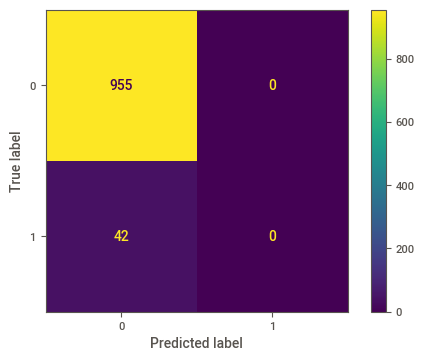

In [ ]:
svm_model = SVC(kernel='rbf', C=1).fit(X_train, y_train)
y_svm = svm_model.predict(X_test)

#Score 
train_score = svm_model.score(X_train, y_train)
test_score = svm_model.score(X_test, y_test)

print("=====================")
print("SVM")
print("=====================")

# Evaluation
print(f'Training Score: {train_score.round(3)}')
print(f'Testing Score: {test_score.round(3)}')
print(f'Accuracy Score: {accuracy_score(y_test,y_svm).round(3)}')
# print("Gaussian model test accuracy: {}\n".format(accuracy_score(y_test, y_gaussian)))

print("\nClassification Report:\n{}".format(classification_report(y_test, y_svm))) 

confusion_matrix = metrics.confusion_matrix(y_test, y_svm)
print("Confusion matrix:\n{}\n".format(confusion_matrix))

print("Plot Confusion matrix:")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=np.unique(y))
cm_display.plot()
plt.show()

Random Forest

Random Forest
Training Score: 1.0
Testing Score: 0.955
Accuracy Score: 0.955
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       955
           1       0.00      0.00      0.00        42

    accuracy                           0.95       997
   macro avg       0.48      0.50      0.49       997
weighted avg       0.92      0.95      0.94       997

Confusion matrix:
[[952   3]
 [ 42   0]]

Plot Confusion matrix:


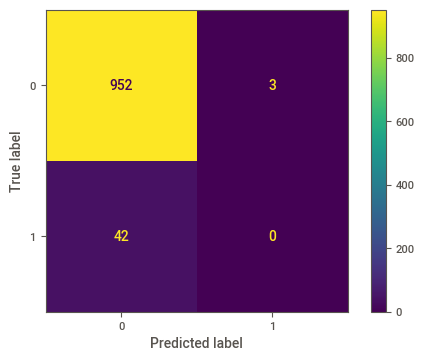

In [ ]:
# Random Forest
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

#Score 
rfc_score = rfc.score(X_train, y_train)
rfc_test = rfc.score(X_test, y_test)

# Model Testing
y_pred = rfc.predict(X_test)

print("=============")
print("Random Forest")
print("=============")
# Evaluation
# rfc_cm = confusion_matrix(y_test,y_pred)
print(f'Training Score: {rfc_score.round(3)}')
print(f'Testing Score: {rfc_test.round(3)}')

# conf_matrix = pd.DataFrame(data=rfc_cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print(f'Accuracy Score: {accuracy_score(y_test,y_pred).round(3)}')

# print("Random Forest model accuracy: {}\n".format(accuracy_score(y_test, y_pred)))
print("Classification Report:\n{}".format(classification_report(y_test, y_pred))) 

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}\n".format(confusion_matrix))

print("Plot Confusion matrix:")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=np.unique(y))
cm_display.plot()
plt.show()

